<a href="https://www.kaggle.com/code/kusumakar/heart-attack-analysis-and-prediction-82-accuracy?scriptVersionId=204371390" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


<div style="background-color:#00008b; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Load the Data in a Data Frame </p></div>

In [2]:
heart = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

<div style="background-color:#00008b; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> View the Data </p></div>

In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<div style="background-color:#00008b; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Total Rows and Columns in the Data </p></div>

In [4]:
heart.shape

(303, 14)

<div style="background-color:#00008b; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Checking Class Imbalance: Ratio of High Chances vs Low Chances </p></div>

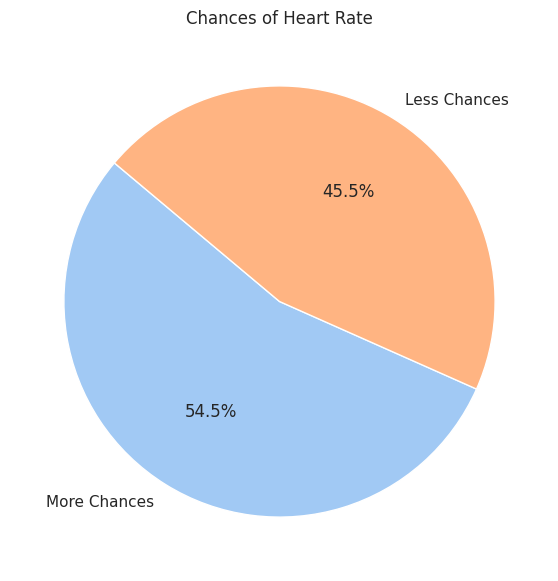

In [5]:
heart.output.value_counts()
labels = ['More Chances', 'Less Chances']
sizes = [len(heart[heart.output==1]),len(heart[heart.output==0])]
colors = sns.color_palette("pastel")[0:2]  # Using a Seaborn color palette

# Apply Seaborn's theme for consistency
sns.set_theme()

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Chances of Heart Rate")
plt.show()

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Our dataset is balanced. 45,5% people have less chances whereas 54.5% have higher chances of facing a Heart Attack </p></div>

<div style="background-color:#00008b; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Outlier Analysis</p></div>

<Axes: >

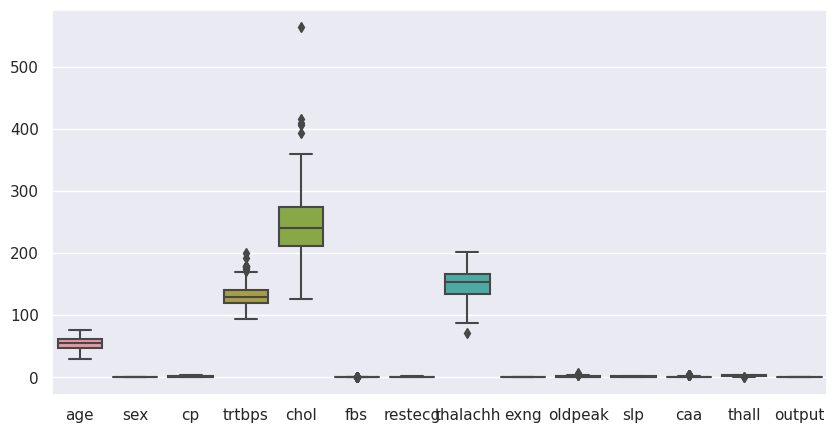

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(heart)

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Remove Outliers using Inter-Quartile Range </p></div>

<Axes: >

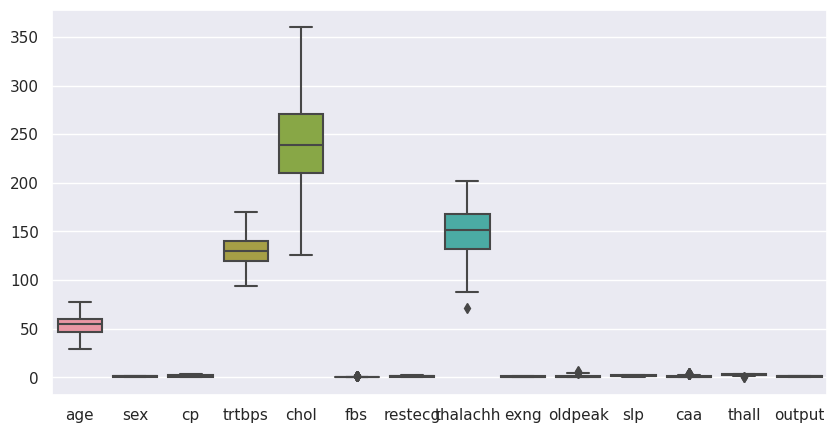

In [7]:
def remove_outlier(column):
    Q1 = heart[column].quantile(0.25)
    Q3 = heart[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
    clean_df = heart[(heart[column] >= lower_bound) & (heart[column] <= upper_bound)]
    return clean_df

heart=remove_outlier('trtbps')
heart = remove_outlier('chol')
plt.figure(figsize=(10,5))
sns.boxplot(heart)

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Our dataset post Outlier Removal </p></div>

<Axes: >

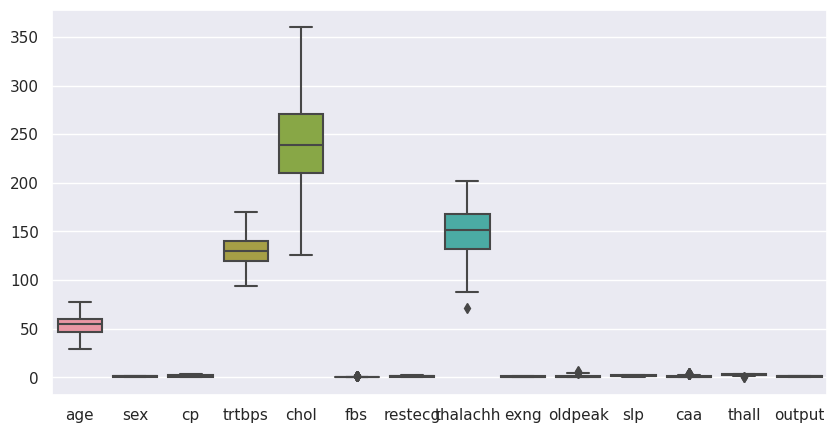

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(heart)

<div style="background-color:#00008b; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Checking the ratio of Gender on Heart Attacks </p></div>

<Axes: xlabel='sex', ylabel='output'>

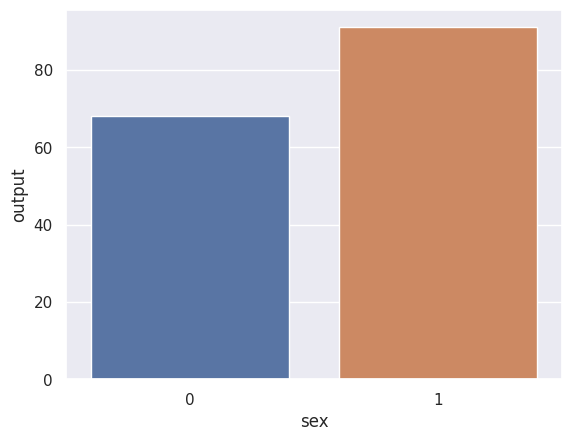

In [9]:
df1=heart.groupby('sex').agg({"output":'sum'}).reset_index()
sns.barplot(x='sex',y='output',data=df1)


In [10]:
df1

,sex,output
0,0,68
1,1,91


<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Around 72 Females and 93 Males have developed more chances of Heart Attack </p></div>

<div style="background-color:#00008b; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Analysis of Chest Pain Type on Severity of Heart Attack  </p></div>

<Axes: xlabel='cp', ylabel='output'>

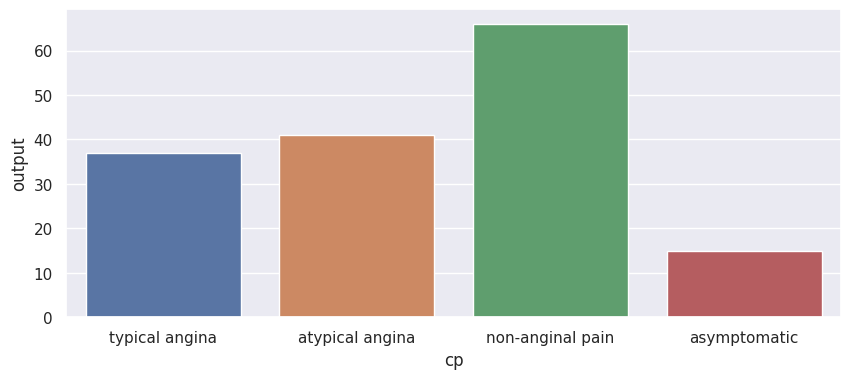

In [11]:
def replace(x):
    if x==0:
        return "typical angina"
    elif x==1:
        return "atypical angina"
    elif x==2:
        return "non-anginal pain"
    else:
        return "asymptomatic"
df1=heart.groupby('cp').agg({"output":'sum'}).reset_index()
df1['cp']=df1['cp'].apply(lambda x:replace(x))

plt.figure(figsize=(10,4))
sns.barplot(x='cp',y='output',data=df1)


<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Non Anginal Pain accounts for most of the heart attacks followed by Atypical Angina </p></div>

<div style="background-color:#00008b; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Does Age have any correlation with Heart Attack Chances ?  </p></div>

<Axes: >

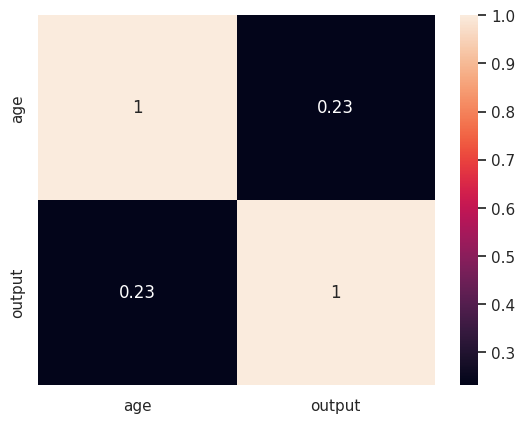

In [12]:
sns.heatmap(heart[['age','output']].corr().abs(),annot=True)

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Above heatmap suggests that Age does not play a major role in defining the severity of Heart Attack </p></div>

<div style="background-color:#00008b; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Variation of Resting Blood Pressure's Impact on Heart Attack Severity  </p></div>

<Axes: xlabel='trtbps', ylabel='output'>

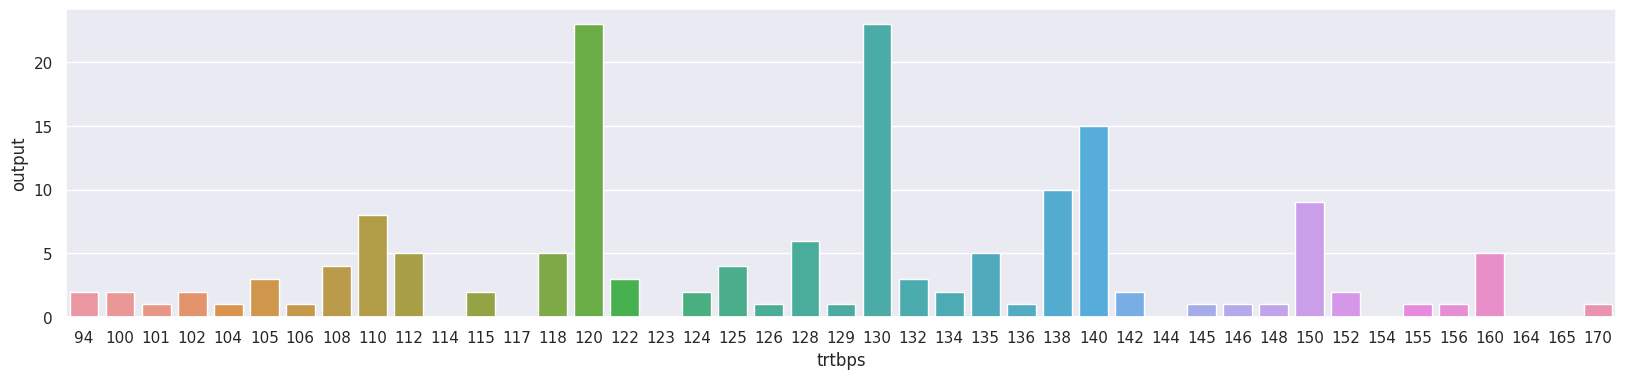

In [13]:

df1=heart.groupby('trtbps').agg({"output":'sum'}).reset_index().sort_values(by='output')

plt.figure(figsize=(20,4))
sns.barplot(x='trtbps',y='output',data=df1)


<div style="background-color:#00008b; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Impact of Cholestrol on Heart Attack </p></div>

<Axes: xlabel='thall', ylabel='output'>

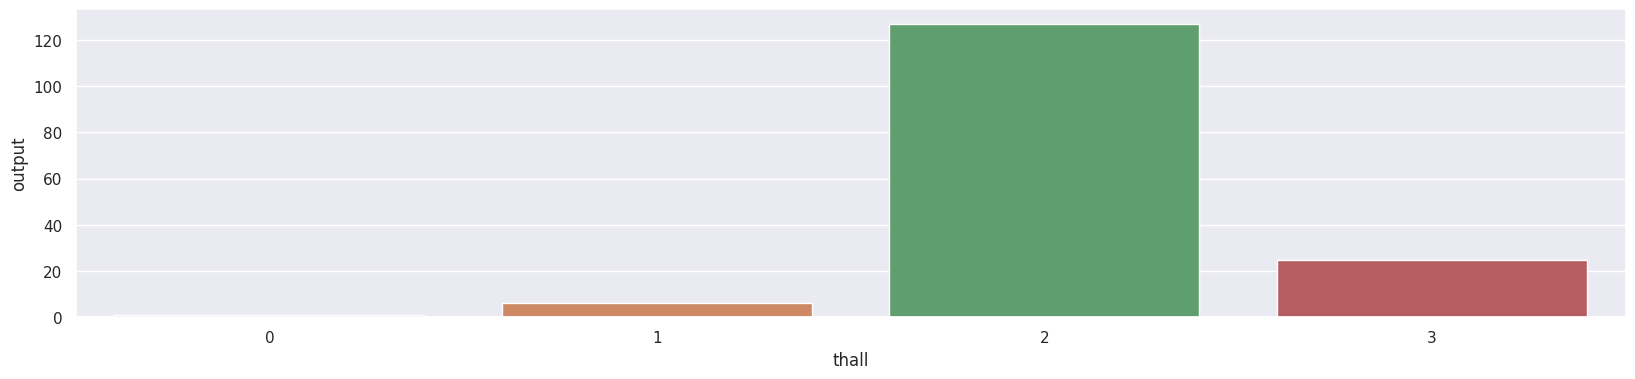

In [14]:

df1=heart.groupby('thall').agg({"output":'sum'}).reset_index().sort_values(by='output')

plt.figure(figsize=(20,4))
sns.barplot(x='thall',y='output',data=df1)

 

<div style="background-color:indigo; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:14px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> maximum heart rate achieved (2) has the highest number of heart attacks </p></div>

<div style="background-color:#00008b; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:white"> Model Training and Evaluation </p></div>

In [15]:
from sklearn.model_selection import train_test_split
X = heart.drop(columns=['output'])
Y=heart['output']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
models = {
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Logistic Regression":LogisticRegression(),
    "XGBoost Classifier":XGBClassifier()
    
}


In [17]:
from sklearn.metrics import accuracy_score

names=[]
accuracies=[]
for name,model in models.items():
    model.fit(X_train,Y_train)
    ypred=model.predict(X_test)
    names.append(name)
    accuracies.append(accuracy_score(Y_test,ypred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
result = pd.DataFrame()
result['Model']=names
result['Accuracy']=accuracies
result

,Model,Accuracy
0,Random Forest Classifier,0.835616
1,Decision Tree Classifier,0.739726
2,Logistic Regression,0.808219
3,XGBoost Classifier,0.794521


<div style="background-color:yellow; padding: 5px 5px 5px 5px; border-radius: 5px; box-shadow: 5px 4px 4px 0 rgba(0, 0, 0, 0.1);border:0px solid #0A2342; text-align:left; color:black">
    <p style="font-size:20px; font-family:tahoma; line-height: 2em; text-indent: 20px;color:black"> Logistic Regression Achieves the best accuracy of 82.19% </p></div>